In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import numpy as np
import time

from copy import deepcopy
from pprint import pprint
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'

from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman

from package.helpers import test_physical_lens
from package.pandeia import pandeia_input
from package.plots import diagnostic_plot, plot

/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'pandeia_noise_residuals')

In [13]:
oversample_factor = 1

pandeia = np.load(os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test', f'detector_{oversample_factor}.npy'))

physical_lens = test_physical_lens.TestPhysicalLens()
model = physical_lens.get_array(num_pix=45 * oversample_factor)

calc = pandeia_input.build_pandeia_calc(array=model, lens=physical_lens, band='f106', oversample_factor=oversample_factor)

100%|██████████| 45/45 [00:00<00:00, 6170.31it/s]


Converting (45, 45) array to point sources...


  0%|          | 0/45 [00:00<?, ?it/s]

100%|██████████| 45/45 [00:12<00:00,  3.55it/s]

Point source conversion complete: 2025 point sources


# Turn off cosmic ray noise

In [5]:
crs_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
crs_off_dict = deepcopy(calculation_dict)

crs_off_dict['noise']['crs'] = False
pprint(crs_off_dict)

crs_off_calc['calculation'] = crs_off_dict

crs_off, execution_time = pandeia_input.get_pandeia_image(crs_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'crs_off.npy'), crs_off)

{'effects': {'saturation': True},
 'noise': {'crs': False,
           'dark': True,
           'excess': False,
           'ffnoise': True,
           'readnoise': True,
           'scatter': True}}
Performing Pandeia calculation...


/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pandeia/engine/report.py:1012: RuntimeWarning: divide by zero encountered in log
  if np.log(abs(val)) < -1*precision and val != 0.0:


Pandeia calculation complete
Execution time: 0:03:04


# Turn off detector dark current noise

In [7]:
dark_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
dark_off_dict = deepcopy(calculation_dict)

dark_off_dict['noise']['dark'] = False
pprint(dark_off_dict)

dark_off_calc['calculation'] = dark_off_dict

dark_off, execution_time = pandeia_input.get_pandeia_image(dark_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'dark_off.npy'), dark_off)

{'effects': {'saturation': True},
 'noise': {'crs': True,
           'dark': False,
           'excess': False,
           'ffnoise': True,
           'readnoise': True,
           'scatter': True}}
Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 0:03:07


# Turn off flat-field noise

In [8]:
ffnoise_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
ffnoise_off_dict = deepcopy(calculation_dict)

ffnoise_off_dict['noise']['ffnoise'] = False
pprint(ffnoise_off_dict)

ffnoise_off_calc['calculation'] = ffnoise_off_dict

ffnoise_off, execution_time = pandeia_input.get_pandeia_image(ffnoise_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'ffnoise_off.npy'), ffnoise_off)

{'effects': {'saturation': True},
 'noise': {'crs': True,
           'dark': True,
           'excess': False,
           'ffnoise': False,
           'readnoise': True,
           'scatter': True}}
Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 0:03:01


# Turn off detector read noise

In [9]:
readnoise_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
readnoise_off_dict = deepcopy(calculation_dict)

readnoise_off_dict['noise']['readnoise'] = False
pprint(readnoise_off_dict)

readnoise_off_calc['calculation'] = readnoise_off_dict

readnoise_off, execution_time = pandeia_input.get_pandeia_image(readnoise_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'readnoise_off.npy'), readnoise_off)

{'effects': {'saturation': True},
 'noise': {'crs': True,
           'dark': True,
           'excess': False,
           'ffnoise': True,
           'readnoise': False,
           'scatter': True}}
Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 0:03:02


# Turn off Echelle scattering noise

In [10]:
scatter_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
scatter_off_dict = deepcopy(calculation_dict)

scatter_off_dict['noise']['scatter'] = False
pprint(scatter_off_dict)

scatter_off_calc['calculation'] = scatter_off_dict

scatter_off, execution_time = pandeia_input.get_pandeia_image(scatter_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'scatter_off.npy'), ffnoise_off)

{'effects': {'saturation': True},
 'noise': {'crs': True,
           'dark': True,
           'excess': False,
           'ffnoise': True,
           'readnoise': True,
           'scatter': False}}
Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 0:02:58


# Turn off pixel saturation effects

In [11]:
saturation_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
saturation_off_dict = deepcopy(calculation_dict)

saturation_off_dict['effects']['saturation'] = False
pprint(saturation_off_dict)

saturation_off_calc['calculation'] = saturation_off_dict

saturation_off, execution_time = pandeia_input.get_pandeia_image(saturation_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'saturation_off.npy'), saturation_off)

{'effects': {'saturation': False},
 'noise': {'crs': True,
           'dark': True,
           'excess': False,
           'ffnoise': True,
           'readnoise': True,
           'scatter': True}}
Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 0:02:55


# Plot residuals

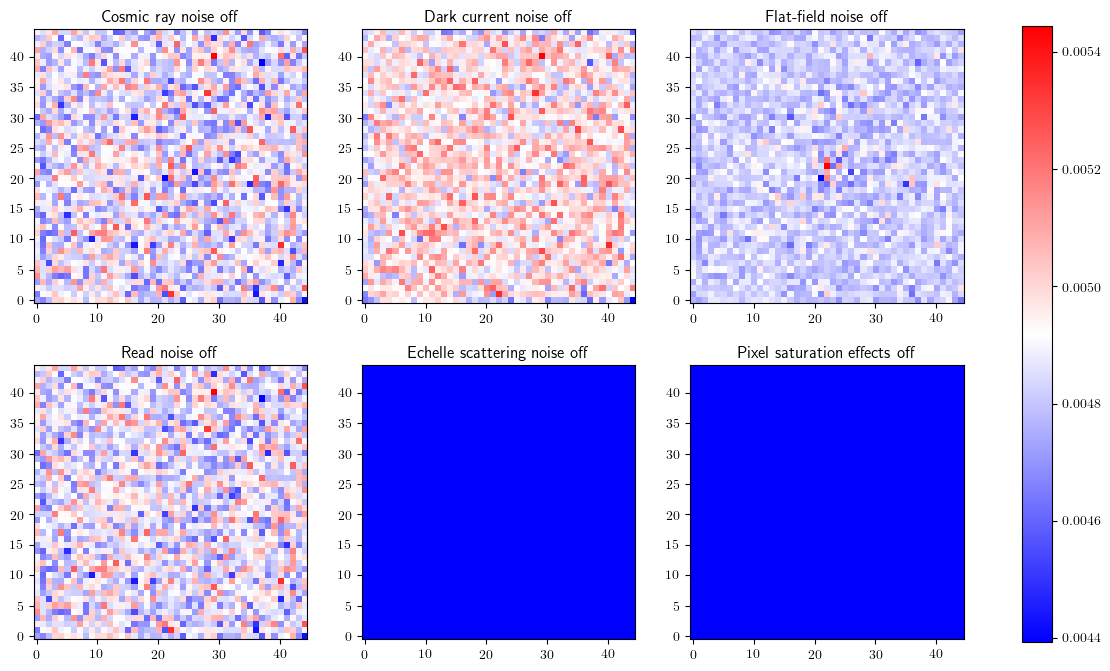

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

im0 = axes[0,0].imshow(pandeia - crs_off, cmap='bwr')
im1 = axes[0,1].imshow(pandeia - dark_off, cmap='bwr')
im2 = axes[0,2].imshow(pandeia - ffnoise_off, cmap='bwr')
im3 = axes[1,0].imshow(pandeia - readnoise_off, cmap='bwr')
im4 = axes[1,1].imshow(pandeia - scatter_off, cmap='bwr')
im5 = axes[1,2].imshow(pandeia - saturation_off, cmap='bwr')

axes[0,0].set_title('Cosmic ray noise off')
axes[0,1].set_title('Dark current noise off')
axes[0,2].set_title('Flat-field noise off')
axes[1,0].set_title('Read noise off')
axes[1,1].set_title('Echelle scattering noise off')
axes[1,2].set_title('Pixel saturation effects off')

fig.colorbar(im1, ax=[axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1], axes[1,2]])

plt.show()